In [1]:
from __future__ import print_function
#import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam, Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

def batch_generator(x_all, y_all, batch_size=128):
    count = 0

    while True:
        
        x_batch = x_all[count:count+batch_size,:,:,:]
        y_batch = y_all[count:count+batch_size,:]
        
        count = count+batch_size
        #print(count)
        
        if count>59000:
            count = 0
            
        yield( (x_batch, y_batch) )

In [5]:
# the neural network model is described:
model_cnn_pure = Sequential()
model_cnn_pure.add(Conv2D(8, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model_cnn_pure.add(MaxPooling2D(pool_size=(4, 4)))
model_cnn_pure.add(Flatten())
model_cnn_pure.add(Dense(num_classes, activation='softmax'))

opt = Adadelta()
model_cnn_pure.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
gener=batch_generator(x_train, y_train)

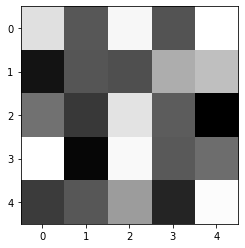

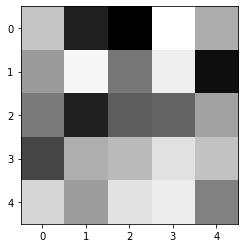

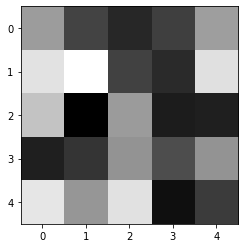

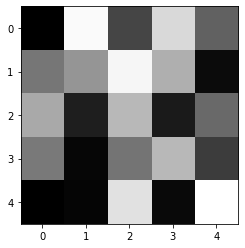

Instructions for updating:
Please use Model.fit, which supports generators.
10/10 [==============================] - 0s 2ms/step - loss: 2.3499 - accuracy: 0.0938


In [6]:
# examine the CNN kernels

layer1=model_cnn_pure.layers[0] # extract the CNN layer
l1_weights = layer1.get_weights() # get the weights of the CNN layer
l1_weights = l1_weights[0] # just get the kernel weights (l1_weights[1] contains the biases)
plt.imshow(l1_weights[:,:,0,0],cmap="gray") # plot the 0th kernel
plt.grid(False)
plt.show()
plt.imshow(l1_weights[:,:,0,1],cmap="gray") # plot the 1st kernel...  etc.
plt.grid(False)
plt.show()
# add more...
plt.imshow(l1_weights[:,:,0,2],cmap="gray") # plot the 2st kernel...  etc.
plt.grid(False)
plt.show()
plt.imshow(l1_weights[:,:,0,3],cmap="gray") # plot the 3st kernel...  etc.
plt.grid(False)
plt.show()

model_cnn_pure.fit_generator(gener, steps_per_epoch=10, verbose=1, epochs=1) # train the network for 10 batches

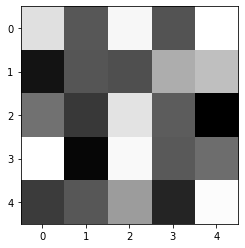

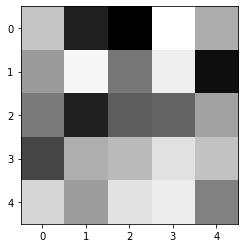

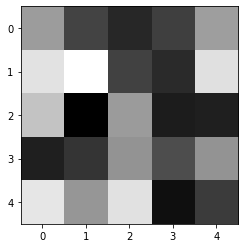

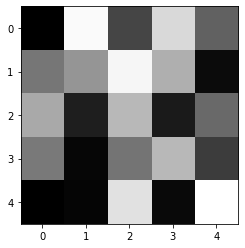

100/100 [==============================] - 0s 2ms/step - loss: 2.3465 - accuracy: 0.0957


In [7]:
# examine the CNN kernels again (after 10 batches)

layer1=model_cnn_pure.layers[0] # extract the CNN layer
l1_weights = layer1.get_weights() # get the weights of the CNN layer
l1_weights = l1_weights[0] # just get the kernel weights (l1_weights[1] contains the biases)
plt.imshow(l1_weights[:,:,0,0],cmap="gray") # plot the 0th kernel
plt.grid(False)
plt.show()
plt.imshow(l1_weights[:,:,0,1],cmap="gray") # plot the 1st kernel...  etc.
plt.grid(False)
plt.show()
# add more...
plt.imshow(l1_weights[:,:,0,2],cmap="gray") # plot the 2nd kernel
plt.grid(False)
plt.show()
plt.imshow(l1_weights[:,:,0,3],cmap="gray") # plot the 3rd kernel...  etc.
plt.grid(False)
plt.show()

model_cnn_pure.fit_generator(gener, steps_per_epoch=100, verbose=1, epochs=1) # train the network for an additional 100 batches

# rinse and repeat..

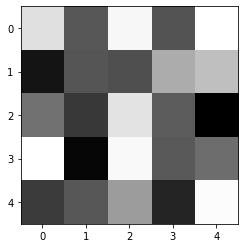

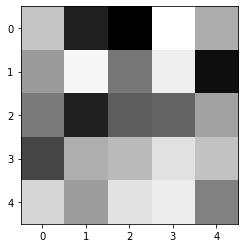

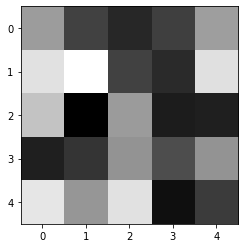

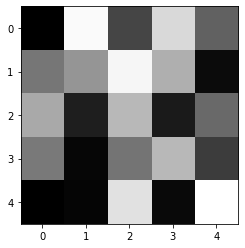

1000/1000 [==============================] - 1s 1ms/step - loss: 2.3274 - accuracy: 0.1011


In [8]:
# examine the CNN kernels again (after 100 batches)

layer1=model_cnn_pure.layers[0] # extract the CNN layer
l1_weights = layer1.get_weights() # get the weights of the CNN layer
l1_weights = l1_weights[0] # just get the kernel weights (l1_weights[1] contains the biases)
plt.imshow(l1_weights[:,:,0,0],cmap="gray") # plot the 0th kernel
plt.grid(False)
plt.show()
plt.imshow(l1_weights[:,:,0,1],cmap="gray") # plot the 1st kernel...  etc.
plt.grid(False)
plt.show()
# add more...
plt.imshow(l1_weights[:,:,0,2],cmap="gray") # plot the 2nd kernel
plt.grid(False)
plt.show()
plt.imshow(l1_weights[:,:,0,3],cmap="gray") # plot the 3rd kernel...  etc.
plt.grid(False)
plt.show()

model_cnn_pure.fit_generator(gener, steps_per_epoch=1000, verbose=1, epochs=1) # train the network for an additional 1000 batches

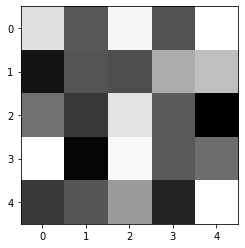

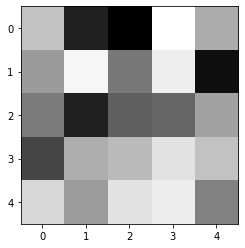

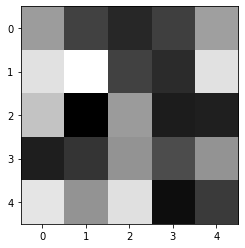

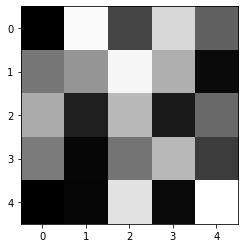

10000/10000 [==============================] - 16s 2ms/step - loss: 2.1776 - accuracy: 0.3009


In [9]:
# examine the CNN kernels again (after 1000 batches)

layer1=model_cnn_pure.layers[0] # extract the CNN layer
l1_weights = layer1.get_weights() # get the weights of the CNN layer
l1_weights = l1_weights[0] # just get the kernel weights (l1_weights[1] contains the biases)
plt.imshow(l1_weights[:,:,0,0],cmap="gray") # plot the 0th kernel
plt.grid(False)
plt.show()
plt.imshow(l1_weights[:,:,0,1],cmap="gray") # plot the 1st kernel...  etc.
plt.grid(False)
plt.show()
# add more...
plt.imshow(l1_weights[:,:,0,2],cmap="gray") # plot the 2nd kernel
plt.grid(False)
plt.show()
plt.imshow(l1_weights[:,:,0,3],cmap="gray") # plot the 3rd kernel...  etc.
plt.grid(False)
plt.show()

model_cnn_pure.fit_generator(gener, steps_per_epoch=10000, verbose=1, epochs=1) # train the network for an additional 10000 batches

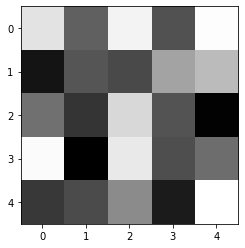

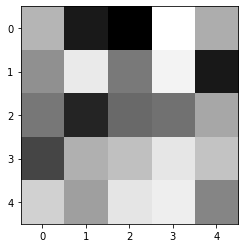

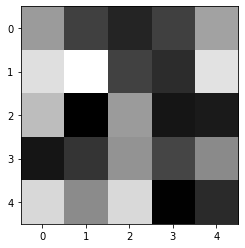

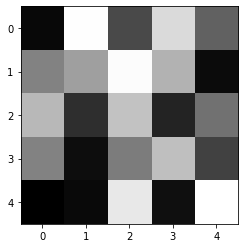

In [10]:
# examine the CNN kernels again (after 10000 batches)

layer1=model_cnn_pure.layers[0] # extract the CNN layer
l1_weights = layer1.get_weights() # get the weights of the CNN layer
l1_weights = l1_weights[0] # just get the kernel weights (l1_weights[1] contains the biases)
plt.imshow(l1_weights[:,:,0,0],cmap="gray") # plot the 0th kernel
plt.grid(False)
plt.show()
plt.imshow(l1_weights[:,:,0,1],cmap="gray") # plot the 1st kernel...  etc.
plt.grid(False)
plt.show()
# add more...
plt.imshow(l1_weights[:,:,0,2],cmap="gray") # plot the 2nd kernel
plt.grid(False)
plt.show()
plt.imshow(l1_weights[:,:,0,3],cmap="gray") # plot the 3rd kernel...  etc.
plt.grid(False)
plt.show()

#model_cnn_pure.fit_generator(gener, steps_per_epoch=100000, verbose=1, epochs=1, max_q_size=1) # train the network for an additional 100000 batches